In [2]:
import sys
from os.path import abspath
sys.path.insert(0, abspath('..'))

from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np


import torch
from torchstc.data import load_data
from torchstc.modules import STC
from torchstc.metrics import SpacePlot, Evaluate
from torchstc.utils.cluster import SphericalKmeans

plot = SpacePlot()
eval = Evaluate()

>>>>> /home/godwin/Documents/academic/PPD/torchclust/demos
>>>>> data_loader.py cwd:  /home/godwin/Documents/academic/PPD/torchclust/demos


[nltk_data] Downloading package punkt to /home/godwin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/godwin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
cur = abspath("")
dataset = 'stackoverflow'
data_in_dir=join(cur, "..", "datasets")
dataset_dir=join(data_in_dir, dataset)

### STC-datstackoverflow-wdeHuggingFace-scaMinMax-tfeNone-normNone-initKmeans + Kmeans

In [4]:
stc_weights=join(data_in_dir, 
                 dataset, 
                 "artefacts",
                 "STC-datstackoverflow-wdeHuggingFace-scaMinMax-tfeNone-normNone-initKmeans.pth")

In [5]:
x, y = load_data(dataset=dataset_dir, word_emb='HuggingFace', transform=None, scaler='MinMax', norm=None)
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(stc_weights)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

MinMax scaling completed...


(torch.Size([18000, 384]),
 torch.Size([2000, 384]),
 torch.Size([18000]),
 torch.Size([2000]))

In [6]:
z = stc.autoencoder.encoder(X_train)

In [8]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_hf_mmx_ikm = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_hf_mmx_ikm = np.array(tmp)
np.round(avg_hf_mmx_ikm.mean(axis=0), 3) * 100, avg_hf_mmx_ikm.std(axis=0)

(array([70.9, 65.5, 56.7]), array([4.e-05, 0.e+00, 4.e-05]))

In [10]:
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z.detach().numpy())
y_km_pred = kmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iter

In [11]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred)

[0.7094, 0.655, 0.5668]

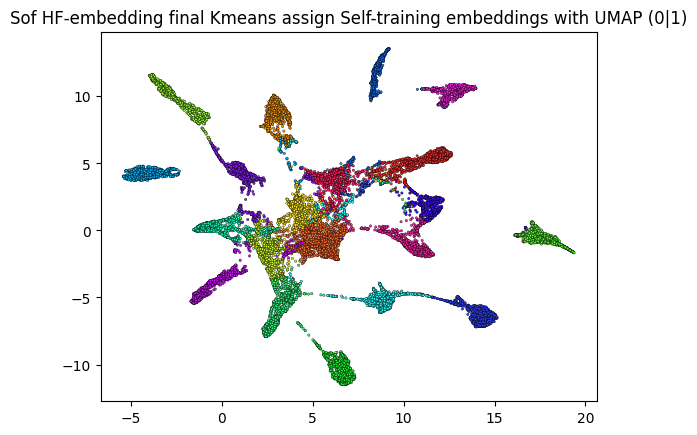

In [13]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred,
                      data_name="Sof HF-embedding final Kmeans assign", dimred = 'UMAP')

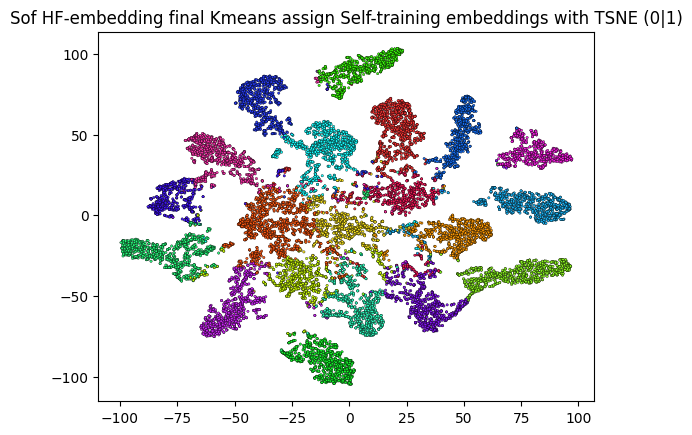

In [15]:
plot.commonSpace_plot(z.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred,
                      data_name="Sof HF-embedding final Kmeans assign", dimred = 'TSNE')

### STC-datstackoverflow-wdeHuggingFace-scaMinMax-tfeNone-normNone-initSphericalKmeans + Kmeans

In [16]:
stc_weights=join(data_in_dir, 
                 dataset, 
                 "artefacts",
                 "STC-datstackoverflow-wdeHuggingFace-scaMinMax-tfeNone-normNone-initSphericalKmeans.pth")

In [17]:
x, y = load_data(dataset=dataset_dir, word_emb='HuggingFace', transform=None, scaler='MinMax', norm=None)
n_clusters = len(torch.unique(torch.tensor(y)))

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# conversion des données en tenseurs
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

stc = STC(hidden_dims=[torch.Tensor(X_train).shape[-1], 500, 500, 2000, 20], n_clusters=n_clusters)
stc.from_pretrained(stc_weights)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

MinMax scaling completed...


(torch.Size([18000, 384]),
 torch.Size([2000, 384]),
 torch.Size([18000]),
 torch.Size([2000]))

In [18]:
z2 = stc.autoencoder.encoder(X_train)

In [19]:
# comprehension list with 5 runs of kmeans, get average and std of metrics
avg_hf_mmx_ikm2 = []
tmp = []
for i in range(5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=50)
    kmeans.fit(z2.detach().numpy())
    y_km_pred = kmeans.labels_
    tmp.append(eval.allMetrics(y_train.detach().numpy(), y_km_pred))

avg_hf_mmx_ikm2 = np.array(tmp)
np.round(avg_hf_mmx_ikm2.mean(axis=0), 3) * 100, avg_hf_mmx_ikm2.std(axis=0)

(array([70.7, 64.8, 56.3]),
 array([1.16619038e-04, 9.79795897e-05, 1.85472370e-04]))

In [21]:
kmeans = KMeans(n_clusters=n_clusters, n_init=50)
kmeans.fit(z2.detach().numpy())
y_km_pred2 = kmeans.labels_

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iter

In [22]:
eval.allMetrics(y_train.detach().numpy(), y_km_pred2)

[0.7064, 0.6484, 0.5634]

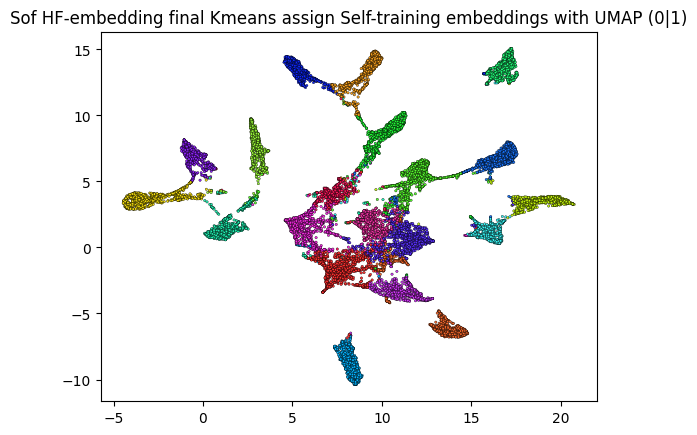

In [24]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred2,
                      data_name="Sof HF-embedding final Kmeans assign", dimred = 'UMAP')

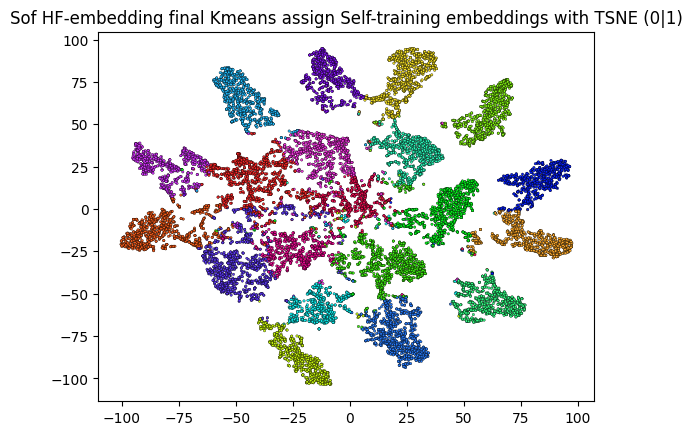

In [25]:
plot.commonSpace_plot(z2.detach().numpy(), comp=[0, 1], tagLabels=y_km_pred2,
                      data_name="Sof HF-embedding final Kmeans assign", dimred = 'TSNE')